# Data Extraction , train and fit our model , evaluate result and optimize model

In [102]:
! pip install tensorflow 
! pip install scikit-learn

### Import necessary libraries

In [103]:
import tensorflow as tf 
import cv2
import numpy as np 
from matplotlib import pyplot as plt 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

### Extract data from the dataset

In [104]:
folder  =  "F:/NULLCLASS/Starting with model/UTKFace"

In [105]:
import os
files  = os.listdir(folder)

### Create List of images from the dataset

In [ ]:
ages = []
genders = []
images = []

for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = folder+'/'+fle
    print(total)
    image = cv2.imread(total)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48,48))
    images.append(image)

### create list of Age and Gender from the dataset

In [107]:
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

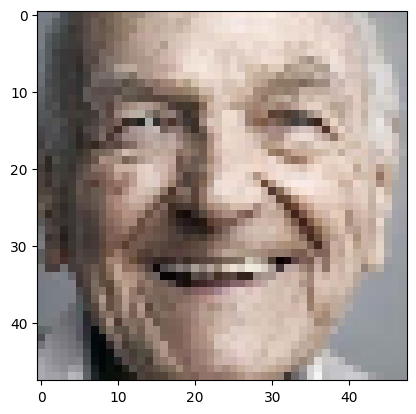

In [108]:
plt.imshow(images[1])

In [109]:
print(ages[1])
print(genders[1])

100
0


In [110]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [111]:
np.save(folder+'image.npy',images_f)
np.save(folder+'ages.npy',ages_f)
np.save(folder+'genders.npy',genders_f)

## find the no. of elements in the dataset 

In [112]:
values, counts = np.unique(genders_f, return_counts= True)
print(counts)

[12391 11317]


### Plotting the No. of Male and Female samples

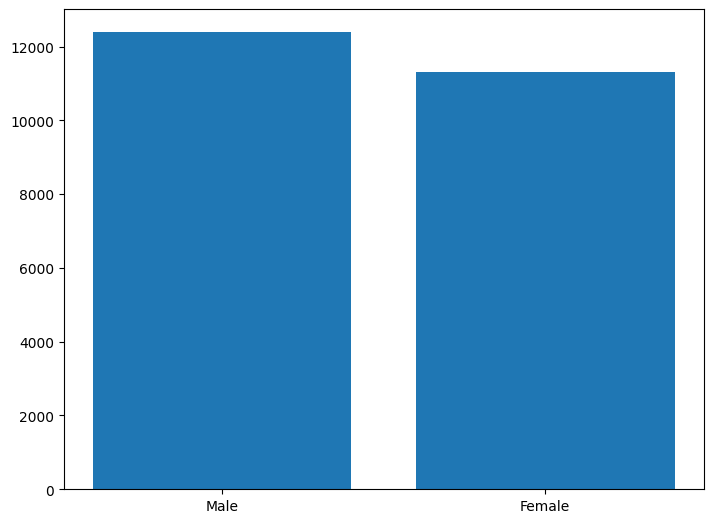

In [113]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
values =  [12391,11317]
ax.bar(gender,values)
plt.show()

  ## Finding the No. of Samples in each age

In [114]:
values, counts = np.unique(ages_f, return_counts = True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


## plotting the samples age wise 

In [115]:
# converting Age counts to lists
val = values.tolist()
cnt = counts.tolist()

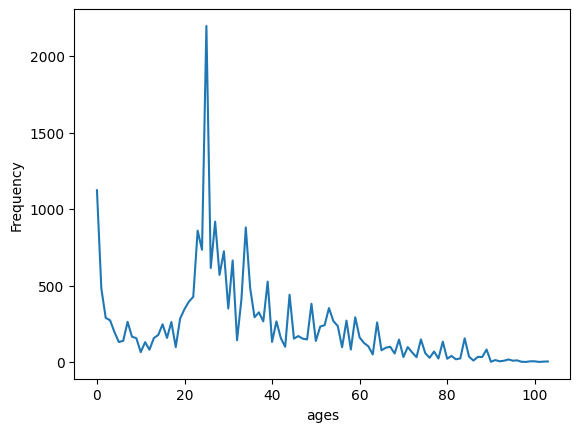

In [116]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('Frequency')
plt.show()

## Defining labels for output

In [124]:
labels = []
i = 0
while i < len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i = i+1

### creating another list of images from existing one

In [125]:
images_f_2 = images_f/255

In [126]:
images_f_2.shape

(23708, 48, 48, 3)

In [127]:
labels_f = np.array(labels)

In [128]:
labels_f.shape

(23708, 2)

In [122]:
from sklearn.model_selection import train_test_split

In [130]:
x_train, x_test, y_train, y_test = train_test_split(images_f_2,labels_f,test_size=0.25)

In [131]:
y_train_2 = [y_train[:,1],y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

## Defining model 

In [132]:
def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters, kernal_size = (3,3), padding = 'same', strides = (1,1), kernel_regularizer = l2(0.001))(input_tensor)
    x =Dropout(0.1)(x)
    x = Activation('relu')(x)

In [ ]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = 